In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df1 = pd.read_csv('deliveries.csv')
df1.head()

match_id  inning         batting_team                 bowling_team  over  \
0         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
1         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
2         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
3         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
4         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   

   ball    batsman non_striker    bowler  is_super_over  ...  bye_runs  \
0     1  DA Warner    S Dhawan  TS Mills              0  ...         0   
1     2  DA Warner    S Dhawan  TS Mills              0  ...         0   
2     3  DA Warner    S Dhawan  TS Mills              0  ...         0   
3     4  DA Warner    S Dhawan  TS Mills              0  ...         0   
4     5  DA Warner    S Dhawan  TS Mills              0  ...         0   

   legbye_runs  noball_runs  penalty_runs  batsman_runs  extra_runs  \
0            0            0             0             0           0   
1            0            0             0             0           0   
2            0            0             0             4           0   
3            0            0             0             0           0   
4            0            0             0             0           2   

   total_runs  player_dismissed dismissal_kind fielder  
0           0               NaN            NaN     NaN  
1           0               NaN            NaN     NaN  
2           4               NaN            NaN     NaN  
3           0               NaN            NaN     NaN  
4           2               NaN            NaN     NaN  

[5 rows x 21 columns]

In [3]:
df2 = pd.read_csv('matches.csv')
df2.head()

id  season       city        date                        team1  \
0   1    2017  Hyderabad  2017-04-05          Sunrisers Hyderabad   
1   2    2017       Pune  2017-04-06               Mumbai Indians   
2   3    2017     Rajkot  2017-04-07                Gujarat Lions   
3   4    2017     Indore  2017-04-08       Rising Pune Supergiant   
4   5    2017  Bangalore  2017-04-08  Royal Challengers Bangalore   

                         team2                  toss_winner toss_decision  \
0  Royal Challengers Bangalore  Royal Challengers Bangalore         field   
1       Rising Pune Supergiant       Rising Pune Supergiant         field   
2        Kolkata Knight Riders        Kolkata Knight Riders         field   
3              Kings XI Punjab              Kings XI Punjab         field   
4             Delhi Daredevils  Royal Challengers Bangalore           bat   

   result  dl_applied                       winner  win_by_runs  \
0  normal           0          Sunrisers Hyderabad           35   
1  normal           0       Rising Pune Supergiant            0   
2  normal           0        Kolkata Knight Riders            0   
3  normal           0              Kings XI Punjab            0   
4  normal           0  Royal Challengers Bangalore           15   

   win_by_wickets player_of_match                                      venue  \
0               0    Yuvraj Singh  Rajiv Gandhi International Stadium, Uppal   
1               7       SPD Smith    Maharashtra Cricket Association Stadium   
2              10         CA Lynn     Saurashtra Cricket Association Stadium   
3               6      GJ Maxwell                     Holkar Cricket Stadium   
4               0       KM Jadhav                      M Chinnaswamy Stadium   

          umpire1        umpire2 umpire3  
0     AY Dandekar       NJ Llong     NaN  
1  A Nand Kishore         S Ravi     NaN  
2     Nitin Menon      CK Nandan     NaN  
3    AK Chaudhary  C Shamshuddin     NaN  
4             NaN            NaN     NaN

In [4]:
match1 = df2[(df2['team1'] == 'Kolkata Knight Riders') & (df2['team2'] == 'Kings XI Punjab')]
match2 = df2[(df2['team1'] == 'Kings XI Punjab') & (df2['team2'] == 'Kolkata Knight Riders')]

Match1 = Kolkata Home Ground

Match2 = Punjab Home Ground

# Overall Kolkata vs Punjab:

In [5]:
match = pd.concat((match1,match2))
match.head()

id  season            city        date                  team1  \
141  142    2009  Port Elizabeth  2009-05-03  Kolkata Knight Riders   
195  196    2010      Chandigarh  2010-03-27  Kolkata Knight Riders   
207  208    2010         Kolkata  2010-04-04  Kolkata Knight Riders   
513  514    2014         Kolkata  2014-05-27  Kolkata Knight Riders   
607  608    2016         Kolkata  2016-05-04  Kolkata Knight Riders   

               team2            toss_winner toss_decision  result  dl_applied  \
141  Kings XI Punjab  Kolkata Knight Riders           bat  normal           0   
195  Kings XI Punjab  Kolkata Knight Riders           bat  normal           0   
207  Kings XI Punjab  Kolkata Knight Riders           bat  normal           0   
513  Kings XI Punjab        Kings XI Punjab         field  normal           0   
607  Kings XI Punjab        Kings XI Punjab         field  normal           0   

                    winner  win_by_runs  win_by_wickets   player_of_match  \
141        Kings XI Punjab            0               6  DPMD Jayawardene   
195  Kolkata Knight Riders           39               0         MK Tiwary   
207        Kings XI Punjab            0               8  DPMD Jayawardene   
513  Kolkata Knight Riders           28               0          UT Yadav   
607  Kolkata Knight Riders            7               0        AD Russell   

                                          venue       umpire1  \
141                            St George's Park      S Asnani   
195  Punjab Cricket Association Stadium, Mohali   BR Doctrove   
207                                Eden Gardens      S Asnani   
513                                Eden Gardens      NJ Llong   
607                                Eden Gardens  AK Chaudhary   

             umpire2 umpire3  
141        MR Benson     NaN  
195           S Ravi     NaN  
207        DJ Harper     NaN  
513           S Ravi     NaN  
607  HDPK Dharmasena     NaN

Matches played between Kolkata and Punjab.

In [6]:
match.shape

(25, 18)

In [7]:
match['winner'].value_counts()

Kolkata Knight Riders    17
Kings XI Punjab           8
Name: winner, dtype: int64

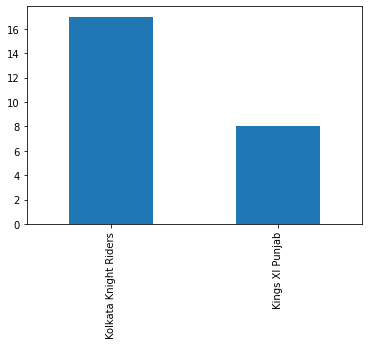

In [8]:
match['winner'].value_counts().plot.bar()
plt.show()

Kolkata won 17 times and Punjab won 8 times against each other.

In [9]:
match['toss_winner'].value_counts()

Kolkata Knight Riders    15
Kings XI Punjab          10
Name: toss_winner, dtype: int64

In [10]:
match['toss_decision'].value_counts()

field    17
bat       8
Name: toss_decision, dtype: int64

In [11]:
match[match['toss_winner'] == match['winner']]['winner'].value_counts()

Kolkata Knight Riders    9
Kings XI Punjab          2
Name: winner, dtype: int64

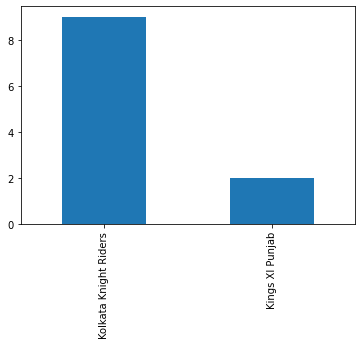

In [12]:
match[match['toss_winner'] == match['winner']]['winner'].value_counts().plot.bar()
plt.show()

Kolkata won the toss and won the match 9 times out of 15 times whereas Punjab 2 times.

In [13]:
ids = list(match['id'])
delivery = df1[df1['match_id'].isin(ids)]
delivery[['wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs']].head(20)

wide_runs  bye_runs  legbye_runs  noball_runs  penalty_runs  \
2355          0         0            0            0             0   
2356          0         0            0            0             0   
2357          0         0            0            0             0   
2358          0         0            0            0             0   
2359          0         0            0            0             0   
2360          0         0            0            0             0   
2361          0         0            0            0             0   
2362          1         0            0            0             0   
2363          0         0            0            0             0   
2364          0         0            0            0             0   
2365          1         0            0            0             0   
2366          0         0            0            0             0   
2367          0         0            0            0             0   
2368          0         0            0            0             0   
2369          0         0            0            0             0   
2370          0         0            0            0             0   
2371          0         0            0            0             0   
2372          0         0            0            0             0   
2373          0         0            0            0             0   
2374          0         0            0            0             0   

      batsman_runs  extra_runs  total_runs  
2355             0           0           0  
2356             4           0           4  
2357             0           0           0  
2358             2           0           2  
2359             4           0           4  
2360             0           0           0  
2361             2           0           2  
2362             0           1           1  
2363             0           0           0  
2364             0           0           0  
2365             0           1           1  
2366             0           0           0  
2367             6           0           6  
2368             1           0           1  
2369             4           0           4  
2370             4           0           4  
2371             0           0           0  
2372             0           0           0  
2373             1           0           1  
2374             0           0           0

Getting the details ball by ball of the matches played between Kolkata and Punjab.

In [14]:
delivery.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

## How many dot balls will be bowled in the entire match:

In [15]:
dot_ball_list = []
for j in ids:
    total_runs = list(delivery[delivery['match_id'] == j]['total_runs'])
    dot_balls = 0
    for i in total_runs:
        if i == 0:
            dot_balls += 1
    dot_ball_list.append(dot_balls)
print(dot_ball_list)

[87, 85, 54, 97, 75, 60, 63, 81, 79, 75, 88, 92, 72, 98, 85, 75, 85, 91, 100, 76, 76, 88, 80, 73, 66]


These are dot balls bowled in a match between Kolkata vs Punjab.

In [16]:
avg_dot_balls = np.mean(dot_ball_list)
avg_dot_balls

80.04

80 dot balls in an average have been bowled in a match between Kolkata and Punjab.

In [17]:
dot_ball_list_Kolkata = []
for j in ids:
    total_runs = list(delivery[(delivery['match_id'] == j) & (delivery['bowling_team'] == 'Kolkata Knight Riders')]['total_runs'])
    dot_balls = 0
    for i in total_runs:
        if i == 0:
            dot_balls += 1
    dot_ball_list_Kolkata.append(dot_balls)
print(dot_ball_list_Kolkata)

[41, 45, 18, 52, 46, 25, 32, 41, 54, 37, 42, 42, 46, 55, 45, 39, 39, 43, 48, 42, 40, 46, 40, 43, 36]


These are dot balls bowled by Kolkata in a match between Kolkata vs Punjab.

In [18]:
avg_dot_balls_Kolkata = np.mean(dot_ball_list_Kolkata)
avg_dot_balls_Kolkata

41.48

~42 dot balls in an average have been bowled by Kolkata in a match between Kolkata and Punjab.

In [19]:
dot_ball_list_Punjab = []
for j in ids:
    total_runs = list(delivery[(delivery['match_id'] == j) & (delivery['bowling_team'] != 'Kolkata Knight Riders')]['total_runs'])
    dot_balls = 0
    for i in total_runs:
        if i == 0:
            dot_balls += 1
    dot_ball_list_Punjab.append(dot_balls)
print(dot_ball_list_Punjab)

[46, 40, 36, 45, 29, 35, 31, 40, 25, 38, 46, 50, 26, 43, 40, 36, 46, 48, 52, 34, 36, 42, 40, 30, 30]


These are dot balls bowled by Punjab in a match between Kolkata vs Punjab.

In [20]:
avg_dot_balls_Punjab = np.mean(dot_ball_list_Punjab)
avg_dot_balls_Punjab

38.56

~39 dot balls in an average have been bowled by Punjab in a match between Kolkata and Punjab.

In [21]:
dot_ball_list_overall_Punjab = []
total_ids = list(df1[df1['bowling_team'] == 'Kings XI Punjab']['match_id'].unique())
for j in total_ids:
    total_runs = list(df1[(df1['match_id'] == j) & (df1['bowling_team'] == 'Kings XI Punjab')]['total_runs'])
    dot_balls = 0
    for i in total_runs:
        if i == 0:
            dot_balls += 1
    dot_ball_list_overall_Punjab.append(dot_balls)
print(dot_ball_list_overall_Punjab)

[32, 53, 25, 41, 38, 16, 33, 23, 64, 50, 24, 38, 38, 25, 34, 47, 69, 39, 40, 46, 58, 40, 42, 43, 24, 41, 44, 50, 37, 9, 26, 46, 52, 54, 52, 46, 40, 37, 47, 47, 53, 62, 53, 44, 36, 35, 52, 35, 40, 40, 25, 36, 30, 33, 58, 39, 36, 36, 38, 34, 44, 32, 43, 40, 45, 49, 38, 41, 62, 51, 26, 35, 42, 54, 40, 36, 40, 38, 34, 45, 44, 42, 44, 29, 47, 63, 60, 61, 34, 53, 46, 44, 41, 51, 48, 44, 32, 49, 39, 48, 49, 41, 50, 34, 46, 47, 52, 55, 47, 30, 52, 34, 41, 43, 38, 43, 51, 45, 37, 36, 49, 58, 42, 42, 38, 44, 42, 26, 39, 38, 40, 41, 15, 36, 31, 31, 38, 30, 39, 33, 48, 29, 34, 31, 62, 33, 29, 46, 26, 39, 32, 29, 35, 49, 51, 40, 33, 36, 31, 10, 38, 42, 40, 40, 34, 45, 37, 41, 44, 28, 32, 36, 35, 22, 30, 34]


These are dot balls bowled by Punjab in overall IPL.

In [22]:
avg_dot_balls_overall_Punjab = np.mean(dot_ball_list_overall_Punjab)
avg_dot_balls_overall_Punjab

40.35795454545455

~41 dot balls in an average have been bowled by Punjab in overall IPL.

In [23]:
dot_ball_list_overall_Kolkata = []
total_ids = list(df1[df1['bowling_team'] == 'Kolkata Knight Riders']['match_id'].unique())
for j in total_ids:
    total_runs = list(df1[(df1['match_id'] == j) & (df1['bowling_team'] == 'Kolkata Knight Riders')]['total_runs'])
    dot_balls = 0
    for i in total_runs:
        if i == 0:
            dot_balls += 1
    dot_ball_list_overall_Kolkata.append(dot_balls)
print(dot_ball_list_overall_Kolkata)

[35, 48, 54, 48, 35, 30, 39, 32, 36, 32, 50, 37, 37, 46, 51, 33, 50, 62, 34, 52, 37, 42, 36, 48, 46, 14, 21, 38, 42, 36, 46, 45, 42, 43, 42, 41, 41, 40, 42, 43, 35, 65, 45, 44, 40, 34, 37, 45, 34, 41, 18, 35, 31, 27, 48, 44, 35, 40, 39, 41, 52, 38, 53, 55, 35, 39, 46, 31, 54, 37, 47, 17, 42, 49, 52, 45, 39, 41, 54, 38, 43, 45, 39, 44, 59, 47, 46, 31, 53, 47, 53, 35, 39, 44, 38, 43, 27, 42, 43, 47, 50, 44, 40, 46, 52, 40, 49, 48, 45, 33, 37, 40, 42, 51, 52, 44, 37, 59, 52, 40, 47, 40, 52, 46, 51, 38, 46, 52, 14, 49, 40, 41, 33, 66, 38, 48, 43, 34, 37, 35, 37, 46, 44, 48, 35, 30, 45, 45, 45, 29, 43, 29, 40, 25, 38, 40, 39, 41, 41, 32, 47, 40, 45, 38, 30, 41, 34, 31, 45, 47, 30, 44, 33, 19, 45, 41, 36, 37]


These are dot balls bowled by Kolkata in overall IPL.

In [24]:
avg_dot_balls_overall_Kolkata = np.mean(dot_ball_list_overall_Kolkata)
avg_dot_balls_overall_Kolkata

41.23033707865169

~42 dot balls in an average have been bowled by Kolkata in overall IPL.

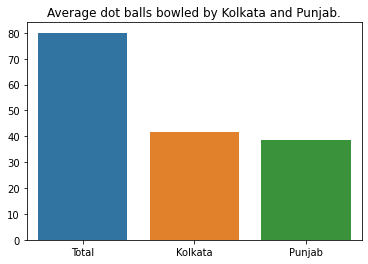

In [25]:
average_dot_balls = pd.Series([avg_dot_balls,avg_dot_balls_Kolkata,avg_dot_balls_Punjab],index = ['Total','Kolkata','Punjab'])
sns.barplot(x=average_dot_balls.index,y=average_dot_balls)
plt.title('Average dot balls bowled by Kolkata and Punjab.')
plt.show()

Kolkata bowled more dot balls than Punjab in a match between them.

## How many wickets will fall from 90th ball to 120th ball of both the innings:

In [26]:
total_wickets = delivery[(delivery['over'] >= 16)]['player_dismissed'].count()
total_wickets

105

Total 105 wickets fall from 90th ball to 120th ball in Kolkata vs Punjab match till now.

In [27]:
avg_wickets = total_wickets/len(ids)
avg_wickets

4.2

~5 wickets in an average fall from 90th ball to 120th ball in a match between Kolkata and Punjab.

In [28]:
total_wickets_1st_inning = delivery[(delivery['over'] >= 16) & (delivery['inning'] == 1)]['player_dismissed'].count()
total_wickets_1st_inning

67

Total 67 wickets fall from 90th ball to 120th ball in Kolkata vs Punjab match till now in the first inning.

In [29]:
avg_wickets_1st_inning = total_wickets_1st_inning/len(ids)
avg_wickets_1st_inning

2.68

~3 wickets in an average fall from 90th ball to 120th ball in a match between Kolkata and Punjab in the first inning.

In [30]:
total_wickets_2nd_inning = delivery[(delivery['over'] >= 16) & (delivery['inning'] == 2)]['player_dismissed'].count()
total_wickets_2nd_inning

38

Total 38 wickets fall from 90th ball to 120th ball in Kolkata vs Punjab match till now in the second inning.

In [31]:
avg_wickets_2nd_inning = total_wickets_2nd_inning/len(ids)
avg_wickets_2nd_inning

1.52

~2 wickets in an average fall from 90th ball to 120th ball in a match between Kolkata and Punjab in the second inning.

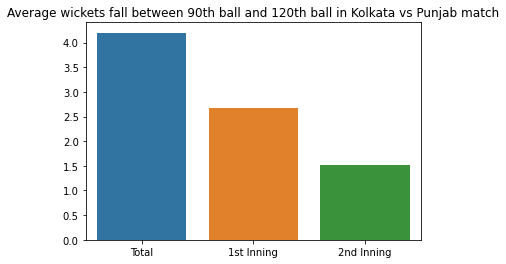

In [32]:
average_wickets = pd.Series([avg_wickets,avg_wickets_1st_inning,avg_wickets_2nd_inning],index = ['Total','1st Inning','2nd Inning'])
sns.barplot(x=average_wickets.index,y=average_wickets)
plt.title('Average wickets fall between 90th ball and 120th ball in Kolkata vs Punjab match')
plt.show()

More wickets fall in 1st inning rather than second inning in between 90th ball and 120th ball in a match between Kolkata and Punjab.

In [33]:
total_wickets_overall_Punjab = df1[(df1['over'] >= 16) & (df1['batting_team'] == 'Kings XI Punjab')]['player_dismissed'].count()
total_wickets_overall_Punjab

403

Total 403 wickets fall of Punjab from 90th ball to 120th ball in overall IPL till now.

In [34]:
total_matches_Punjab = list(df1[df1['batting_team'] == 'Kings XI Punjab']['match_id'].unique())
avg_wickets_overall_Punjab = total_wickets_overall_Punjab/len(total_matches_Punjab)
avg_wickets_overall_Punjab

2.289772727272727

~3 wickets in an average fall from 90th ball to 120th ball of Punjab in overall IPL.

In [35]:
total_wickets_overall_Kolkata = df1[(df1['over'] >= 16) & (df1['batting_team'] == 'Kolkata Knight Riders')]['player_dismissed'].count()
total_wickets_overall_Kolkata

368

Total 368 wickets fall of Kolkata from 90th ball to 120th ball in overall IPL till now.

In [36]:
total_matches_Kolkata = list(df1[df1['batting_team'] == 'Kolkata Knight Riders']['match_id'].unique())
avg_wickets_overall_Kolkata = total_wickets_overall_Kolkata/len(total_matches_Kolkata)
avg_wickets_overall_Kolkata

2.067415730337079

~3 wickets in an average fall from 90th ball to 120th ball of Kolkata in overall IPL.

## What would be Glenn Maxwell's contribution to the team total:

In [37]:
contribution_list = []
ids_Maxwell = list(delivery[(delivery['batsman'] == 'GJ Maxwell') & (delivery['batting_team'] == 'Kings XI Punjab')]['match_id'].unique())
for j in ids_Maxwell:
    batsman_runs = list(delivery[(delivery['match_id'] == j) & (delivery['batsman'] == 'GJ Maxwell') & (delivery['batting_team'] == 'Kings XI Punjab')]['batsman_runs'])
    total_runs = list(delivery[(delivery['match_id'] == j) & (delivery['batting_team'] == 'Kings XI Punjab')]['total_runs'])
    batsman = 0
    total = 0
    for i in batsman_runs:
        batsman += i
    for i in total_runs:
        total += i
    contribution = np.round((batsman/total)*100,2)
    if contribution > 0:
        contribution_list.append(contribution)
print(contribution_list)

[14.71, 26.35, 11.36, 9.4, 4.44, 21.29, 23.5, 2.9, 43.31]


So this is the distribution of Glenn Maxwell (in percentage) to his team Punjab against Kolkata.

In [38]:
avg_contribution = np.round(np.mean(contribution_list),2)
avg_contribution

17.47

Glenn Maxwell scored 17.47% runs in average per match of total score of his team against Kolkata.

In [39]:
contribution_list_batting_first = []
ids_Rahul_batting_first = list(delivery[(delivery['batsman'] == 'GJ Maxwell') & (delivery['inning'] == 1) & (delivery['batting_team'] == 'Kings XI Punjab')]['match_id'].unique())
for j in ids_Rahul_batting_first:
    batsman_runs = list(delivery[(delivery['match_id'] == j) & (delivery['batsman'] == 'GJ Maxwell') & (delivery['inning'] == 1) & (delivery['batting_team'] == 'Kings XI Punjab')]['batsman_runs'])
    total_runs = list(delivery[(delivery['match_id'] == j) & (delivery['batting_team'] == 'Kings XI Punjab') & (delivery['inning'] == 1)]['total_runs'])
    batsman = 0
    total = 0
    for i in batsman_runs:
        batsman += i
    for i in total_runs:
        total += i
    contribution = np.round((batsman/total)*100,2)
    if contribution > 0:
        contribution_list_batting_first.append(contribution)
print(contribution_list_batting_first)

[14.71, 26.35, 11.36, 9.4, 21.29, 23.5, 2.9]


So this is the distribution of Glenn Maxwell (in percentage) to his team Punjab against Kolkata while batting first.

In [40]:
avg_contribution_batting_first = np.round(np.mean(contribution_list_batting_first),2)
avg_contribution_batting_first

15.64

Glenn Maxwell scored 15.64% runs in average per match of total score of his team against Kolkata while batting first.

In [41]:
contribution_list_batting_second = []
ids_Rahul_batting_first = list(delivery[(delivery['batsman'] == 'GJ Maxwell') & (delivery['inning'] == 2) & (delivery['batting_team'] == 'Kings XI Punjab')]['match_id'].unique())
for j in ids_Rahul_batting_first:
    batsman_runs = list(delivery[(delivery['match_id'] == j) & (delivery['batsman'] == 'GJ Maxwell') & (delivery['inning'] == 2) & (delivery['batting_team'] == 'Kings XI Punjab')]['batsman_runs'])
    total_runs = list(delivery[(delivery['match_id'] == j) & (delivery['batting_team'] == 'Kings XI Punjab') & (delivery['inning'] == 2)]['total_runs'])
    batsman = 0
    total = 0
    for i in batsman_runs:
        batsman += i
    for i in total_runs:
        total += i
    contribution = np.round((batsman/total)*100,2)
    if contribution > 0:
        contribution_list_batting_second.append(contribution)
print(contribution_list_batting_second)

[4.44, 43.31]


So this is the distribution of Glenn Maxwell (in percentage) to his team Punjab against Kolkata while batting second.

In [42]:
avg_contribution_batting_second = np.round(np.mean(contribution_list_batting_second),2)
avg_contribution_batting_second

23.88

Glenn Maxwell played only two inning in the second half and scored 23.88% runs in average per match of total score of his team against Kolkata.

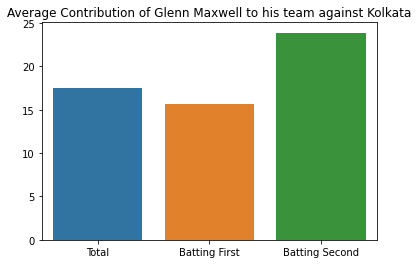

In [43]:
average_contribution = pd.Series([avg_contribution,avg_contribution_batting_first,avg_contribution_batting_second],index = ['Total','Batting First','Batting Second'])
sns.barplot(x = average_contribution.index , y = average_contribution)
plt.title('Average Contribution of Glenn Maxwell to his team against Kolkata')
plt.show()

So Glenn Maxwell contributed more in the second inning for his team against Kolkata.

In [44]:
contribution_list_overall = []
total_ids1 = list(df1[(df1['batsman'] == 'GJ Maxwell') & (df1['batting_team'] == 'Kings XI Punjab')]['match_id'].unique())
for j in total_ids1:
    batsman_runs = list(df1[(df1['match_id'] == j) & (df1['batsman'] == 'GJ Maxwell') & (df1['batting_team'] == 'Kings XI Punjab')]['batsman_runs'])
    total_runs = list(df1[(df1['match_id'] == j) & (df1['batting_team'] == 'Kings XI Punjab')]['total_runs'])
    batsman = 0
    total = 0
    for i in batsman_runs:
        batsman += i
    for i in total_runs:
        total += i
    contribution = np.round((batsman/total)*100,2)
    if contribution > 0:
        contribution_list_overall.append(contribution)
print(contribution_list_overall)

[26.83, 28.67, 14.71, 6.49, 20.2, 16.49, 4.35, 10.58, 26.35, 20.43, 46.12, 46.11, 49.22, 11.36, 4.72, 26.79, 38.96, 12.63, 9.4, 20.38, 8.48, 1.28, 4.44, 5.75, 5.15, 3.39, 9.09, 21.29, 0.97, 8.05, 1.14, 23.5, 6.11, 9.43, 4.62, 1.24, 20.92, 2.9, 0.7, 34.15, 43.31, 8.84]


So this is the distribution of Glenn Maxwell (in percentage) to his team Punjab in overall IPL.

In [45]:
avg_contribution_overall = np.round(np.mean(contribution_list_overall),2)
avg_contribution_overall

15.85

Glenn Maxwell scored 15.85% runs in average per match of total score of his team in overall IPL.

In [46]:
contribution_list_overall_batting_first = []
total_ids1 = list(df1[(df1['batsman'] == 'GJ Maxwell') & (df1['batting_team'] == 'Kings XI Punjab')]['match_id'].unique())
for j in total_ids1:
    batsman_runs = list(df1[(df1['match_id'] == j) & (df1['batsman'] == 'GJ Maxwell') & (df1['inning'] == 1) & (df1['batting_team'] == 'Kings XI Punjab')]['batsman_runs'])
    total_runs = list(df1[(df1['match_id'] == j) & (df1['batting_team'] == 'Kings XI Punjab') & (df1['inning'] == 1)]['total_runs'])
    batsman = 0
    total = 0
    for i in batsman_runs:
        batsman += i
    for i in total_runs:
        total += i
    if total > 0:
        contribution = np.round((batsman/total)*100,2)
    if contribution > 0 and contribution not in contribution_list_overall_batting_first:
        contribution_list_overall_batting_first.append(contribution)
print(contribution_list_overall_batting_first)

[14.71, 20.2, 16.49, 4.35, 10.58, 26.35, 20.43, 49.22, 11.36, 26.79, 38.96, 12.63, 9.4, 1.28, 5.75, 3.39, 9.09, 21.29, 23.5, 9.43, 4.62, 1.24, 2.9, 0.7, 8.84]


So this is the distribution of Glenn Maxwell (in percentage) to his team Punjab in overall IPL while batting first.

In [47]:
avg_contribution_overall_batting_first = np.round(np.mean(contribution_list_overall_batting_first),2)
avg_contribution_overall_batting_first

14.14

Glenn Maxwell scored 14.14% runs in average per match of total score of his team in overall IPL while batting first.

In [48]:
contribution_list_overall_batting_second = []
total_ids1 = list(df1[(df1['batsman'] == 'GJ Maxwell') & (df1['batting_team'] == 'Kings XI Punjab')]['match_id'].unique())
for j in total_ids1:
    batsman_runs = list(df1[(df1['match_id'] == j) & (df1['batsman'] == 'GJ Maxwell') & (df1['inning'] == 2) & (df1['batting_team'] == 'Kings XI Punjab')]['batsman_runs'])
    total_runs = list(df1[(df1['match_id'] == j) & (df1['batting_team'] == 'Kings XI Punjab') & (df1['inning'] == 2)]['total_runs'])
    batsman = 0
    total = 0
    for i in batsman_runs:
        batsman += i
    for i in total_runs:
        total += i
    if total > 0:
        contribution = np.round((batsman/total)*100,2)
    if contribution > 0 and contribution not in contribution_list_overall_batting_second:
        contribution_list_overall_batting_second.append(contribution)
print(contribution_list_overall_batting_second)

[26.83, 28.67, 6.49, 46.12, 46.11, 4.72, 20.38, 8.48, 4.44, 5.15, 0.52, 8.05, 1.14, 6.11, 20.92, 34.15, 43.31]


So this is the distribution of Glenn Maxwell (in percentage) to his team Punjab in overall IPL while batting second.

In [49]:
avg_contribution_overall_batting_second = np.round(np.mean(contribution_list_overall_batting_second),2)
avg_contribution_overall_batting_second

18.33

Glenn Maxwell scored 18.33% runs in average per match of total score of his team in overall IPL while batting second.

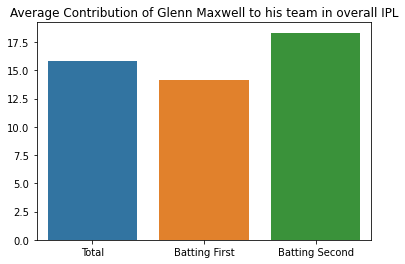

In [50]:
average_contribution_overall = pd.Series([avg_contribution_overall,avg_contribution_overall_batting_first,avg_contribution_overall_batting_second],index = ['Total','Batting First','Batting Second'])
sns.barplot(x = average_contribution_overall.index , y = average_contribution_overall)
plt.title('Average Contribution of Glenn Maxwell to his team in overall IPL')
plt.show()

So Glenn Maxwell contributed more in the second inning for his team in overall IPL.

## How many no-balls will be bowled in the match.

In [51]:
total_no_balls = delivery['noball_runs'].sum()
total_no_balls

11

Total 11 no balls were bowled in Kolkata vs Punjab match till now.

In [52]:
noballs_by_Kolkata = delivery[delivery['bowling_team'] == 'Kolkata Knight Riders']['noball_runs'].sum()
noballs_by_Kolkata

5

Kolkata bowled 5 no-balls against Punjab.

In [53]:
noballs_by_Punjab = delivery[delivery['bowling_team'] == 'Kings XI Punjab']['noball_runs'].sum()
noballs_by_Punjab

6

Punjab bowled 6 no-balls against Kolkata.

In [54]:
avg_noballs = (total_no_balls/len(ids))
avg_noballs

0.44

There is less than 1 no-ball in an average per match between Kolkata and Punjab.

In [55]:
noballs_bowling_first = delivery[delivery['inning'] == 1]['noball_runs'].sum()
noballs_bowling_first

10

Team bowled 10 no-balls while bowling first.

In [56]:
avg_noballs_bowling_first = (noballs_bowling_first/len(ids))
avg_noballs_bowling_first

0.4

There is less than 1 no-ball in an average per match by team bowling first.

In [57]:
noballs_bowling_second = delivery[delivery['inning'] == 2]['noball_runs'].sum()
noballs_bowling_second

1

Team bowled only 1 no-ball while bowling second.

In [58]:
avg_noballs_bowling_second = (noballs_bowling_second/len(ids))
avg_noballs_bowling_second

0.04

There is very less chances of no-ball in an average per match by team bowling second.

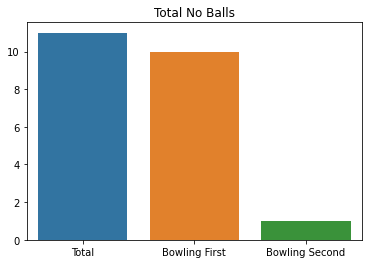

In [59]:
total_noballs_per_match = pd.Series([total_no_balls,noballs_bowling_first,noballs_bowling_second],index=['Total','Bowling First','Bowling Second'])
sns.barplot(x = total_noballs_per_match.index , y = total_noballs_per_match)
plt.title('Total No Balls')
plt.show()

There is very less chances of no-ball in the match between Kolkata and Punjab.

In [60]:
noballs_by_Kolkata_overall = df1[df1['bowling_team'] == 'Kolkata Knight Riders']['noball_runs'].sum()
noballs_by_Kolkata_overall

77

Kolkata bowled 77 no-balls in overall IPL till now.

In [61]:
total_matches_Kolkata = list(df1[df1['bowling_team'] == 'Kolkata Knight Riders']['match_id'].unique())
avg_noballs_by_Kolkata = noballs_by_Kolkata_overall/len(total_matches_Kolkata)
avg_noballs_by_Kolkata

0.43258426966292135

There is less than 1 no-ball in an average per match by Kolkata in IPL.

In [62]:
noballs_by_Punjab_overall = df1[df1['bowling_team'] == 'Kings XI Punjab']['noball_runs'].sum()
noballs_by_Punjab_overall

103

Punjab bowled 103 no-balls in overall IPL till now.

In [63]:
total_matches_Punjab = list(df1[df1['bowling_team'] == 'Kings XI Punjab']['match_id'].unique())
avg_noballs_by_Punjab = noballs_by_Punjab_overall/len(total_matches_Punjab)
avg_noballs_by_Punjab

0.5852272727272727

There is less than 1 no-ball in an average per match by Punjab in IPL.